In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Put CSV file in dataframe
df_products = pd.read_csv("all_products.csv")
df_inflation = pd.read_csv("inflation_per_month.csv")
df_nasdaq = pd.read_csv("nasdaq_historical_data.csv")

In [3]:
# Show first 5 rows of products dataframe
df_products.head()

,product_name,year,month,us_city_average_retail_price,category
0,American Cheese,1984,1,2.485,Dairy Products
1,American Cheese,1984,2,2.495,Dairy Products
2,American Cheese,1984,3,2.493,Dairy Products
3,American Cheese,1984,4,2.501,Dairy Products
4,American Cheese,1984,5,2.472,Dairy Products


In [4]:
# Show first 5 rows of average inflation rate
df_inflation.head()

,year,month,cpi_overall_monthly_change_in_perc
0,1974,1,9.4
1,1974,2,10.0
2,1974,3,10.4
3,1974,4,10.1
4,1974,5,10.7


In [5]:
# Show first five row of average monthly nasdaq stock price dataframe
df_nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,247.100006,278.899994,245.800003,278.700012,278.700012,1782060000
1,1985-02-01,277.899994,289.299988,277.899994,284.200012,284.200012,1742850000
2,1985-03-01,285.100006,287.799988,275.600006,279.200012,279.200012,1611310000
3,1985-04-01,279.500000,284.799988,276.200012,280.600006,280.600006,1506450000
4,1985-05-01,280.500000,294.799988,278.799988,290.799988,290.799988,1673270000


In [6]:
# Convert date feature from nasdaq dataframe to datetime format
date = pd.to_datetime(df_nasdaq['Date'], format='%Y-%m-%d')

# Put month & year values of Date feature in seperate columns
df_nasdaq['year'] = date.dt.year
df_nasdaq['month'] = date.dt.month

# Drop Date feature from nasdaq dataframe
df_nasdaq.drop(['Date'], axis=1, inplace=True)

In [7]:
# Get the mean of all products prices per month & year in products dataframe
prd_price = df_products.groupby(by=['category','product_name', 'year','month']).mean().reset_index()

# Sort dataframe on product name, month & year
prd_price = prd_price.sort_values(by=['category', 'product_name', 'month', 'year'])

# Show first five rows
prd_price.head()

,category,product_name,year,month,us_city_average_retail_price
0,Animal Products,Beef chunks,1980,1,1.821
12,Animal Products,Beef chunks,1981,1,1.856
24,Animal Products,Beef chunks,1982,1,1.794
36,Animal Products,Beef chunks,1983,1,1.756
48,Animal Products,Beef chunks,1984,1,1.721


In [8]:
# Left join nasdaq dataframe to products dataframe on year & month
prd_price = pd.merge(prd_price, df_nasdaq, how='left', on=['year', 'month'])

In [9]:
# Get rows with years later than 1985 and first column of nasdaq dataframe
prd_price = prd_price[prd_price['year'] >= 1985].iloc[:, 0:6]

# Show first five rows of dataframe
prd_price.head()

,category,product_name,year,month,us_city_average_retail_price,Open
5,Animal Products,Beef chunks,1985,1,1.711,247.100006
6,Animal Products,Beef chunks,1986,1,1.662,325.000000
7,Animal Products,Beef chunks,1987,1,1.694,351.299988
8,Animal Products,Beef chunks,1988,1,1.736,335.100006
9,Animal Products,Beef chunks,1989,1,1.806,378.899994


In [10]:
# Set index of dataframe to category, product_name, year & month features
prd_price = prd_price.set_index(['category', 'product_name', 'year', 'month'])

# Get difference in percentage of product price & nasdaq stock with the price a the year prior 
# Reset index back to original index
avg_diff = prd_price.pct_change().reset_index()

# Show first five rows of dataframe
avg_diff.head()

,category,product_name,year,month,us_city_average_retail_price,Open
0,Animal Products,Beef chunks,1985,1,NaN,NaN
1,Animal Products,Beef chunks,1986,1,-0.028638,0.315257
2,Animal Products,Beef chunks,1987,1,0.019254,0.080923
3,Animal Products,Beef chunks,1988,1,0.024793,-0.046114
4,Animal Products,Beef chunks,1989,1,0.040323,0.130707


In [11]:
# Left join average inflation data on year & month
avg_diff = pd.merge(avg_diff, df_inflation,  how='left', on=['year', 'month'])

# Show first five rows of dataframe
avg_diff.head()

,category,product_name,year,month,us_city_average_retail_price,Open,cpi_overall_monthly_change_in_perc
0,Animal Products,Beef chunks,1985,1,NaN,NaN,3.5
1,Animal Products,Beef chunks,1986,1,-0.028638,0.315257,3.9
2,Animal Products,Beef chunks,1987,1,0.019254,0.080923,1.5
3,Animal Products,Beef chunks,1988,1,0.024793,-0.046114,4.0
4,Animal Products,Beef chunks,1989,1,0.040323,0.130707,4.7


In [12]:
# Divide inflation percentage by 100 to normalize feature
avg_diff['cpi_overall_monthly_change_in_perc'] = avg_diff['cpi_overall_monthly_change_in_perc']/100

# Show first five rows of dataframe
avg_diff.head()

,category,product_name,year,month,us_city_average_retail_price,Open,cpi_overall_monthly_change_in_perc
0,Animal Products,Beef chunks,1985,1,NaN,NaN,0.035
1,Animal Products,Beef chunks,1986,1,-0.028638,0.315257,0.039
2,Animal Products,Beef chunks,1987,1,0.019254,0.080923,0.015
3,Animal Products,Beef chunks,1988,1,0.024793,-0.046114,0.040
4,Animal Products,Beef chunks,1989,1,0.040323,0.130707,0.047


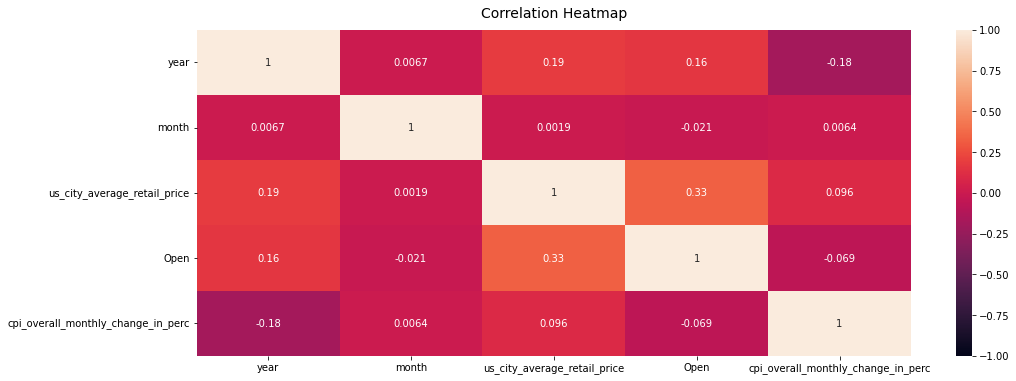

In [13]:
# Check if there is a correlation with average price difference over year and inflation
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(avg_diff.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [14]:
# Drop month feature because of insignificance to other features
avg_diff.drop(['month'], axis=1, inplace=True)

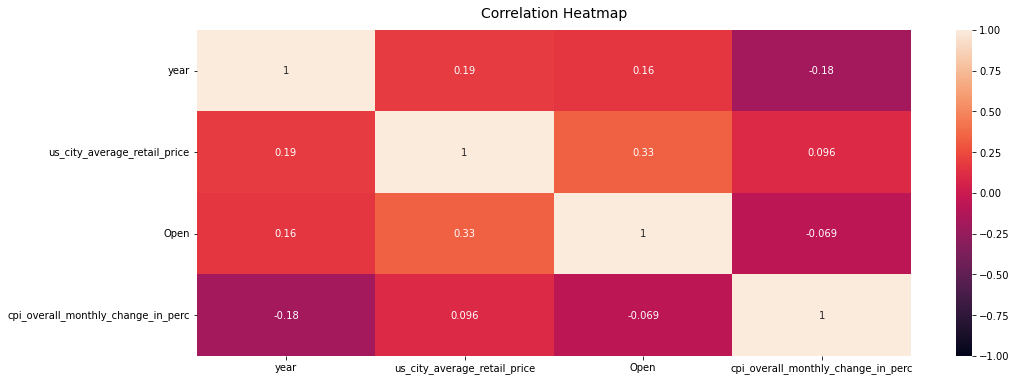

In [15]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(avg_diff.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [16]:
# Train model on inflation, year and price difference ??